In [6]:
# Print your Emory ID here
print("Emory ID: 2551023")

Emory ID: 2551023


In [7]:
# Import the necessary libraries and load the data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('passwords.csv')

1. An online password attack is when someone tries to hack your account by simply trying a very large number of username/password combinations to access your account. For each `password` in our dataset, the `value` column shows the amount of time it is estimated to take an “online password attack” to hack your account. The column `time_unit` shows the units of that time value (e.g., hours, days, years, etc.). It would be much nicer if our values were of the same units so we can more easily compare the “online password guessing time” for each password. So your first task is to convert all of the values to units of hours (assume the conversion units provided below, e.g., 1 day is 24 hours, 1 week is 168 hours, etc).

In [8]:
# Your answer here 
units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "hours":1,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}
df['value_in_hours'] = df.apply(
    lambda row: row['value'] * units.get(row['time_unit'], 1), axis=1
)


2. Are there any missing values in the dataset? If so, how many? After you have counted the, please drop them from the dataset.
- there are 7 missing values in each variable. 

In [9]:
# Your answer here
print(df.isnull().sum())
df=df.dropna()

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
value_in_hours       7
dtype: int64


3.Which password category has the highest average strength? 
- Nerdy-pop has the highest average strength. 

In [10]:
# Your answer here
df.groupby('category')['strength'].mean().sort_values(ascending=False)

category
nerdy-pop              14.000000
sport                   8.000000
password-related        7.866667
animal                  7.551724
cool-macho              7.215190
name                    7.191257
fluffy                  6.772727
rebellious-rude         6.727273
simple-alphanumeric     5.852459
food                    4.363636
Name: strength, dtype: float64

4. What is the rank of the password 'qwerty'?
- the rank is 5

In [11]:
# Your answer here
df.query("password=='qwerty'")['rank'].values[0]

5.0

5. How many passwords have more than 8 characters?
- only 1

In [12]:
# Your answer here
df[df['password'].str.len()>8]['password'].count()

1

6. How many passwords do not contain a number?
- 446

In [13]:
# Your answer here
df[~df['password'].str.contains(r'\d')]['password'].count()

446

7. What is the average time in hours needed to crack these passwords that begin with `123`? How does this compare to the average of all passwords in the dataset?
- The average time in hours need that begins with 123 is about 107.3 which is much less than average of all passwords (13917.6)

In [14]:
# Your answer here
avg1=df[df['password'].str.startswith('123')]['value_in_hours'].mean()
avg2=df['value_in_hours'].mean()
print(avg1)
print(avg2)

107.30332438271606
13917.565247227776


8. What percentage of passwords are of the `simple-alphanumeric` category?
- there are 12.2 percentage of passwards

In [15]:
# Your answer here
total_passwords = df.shape[0]
count = df[df['category'] == 'simple-alphanumeric'].shape[0]
(count / total_passwords) * 100

12.2

9. How many passwords have a strength rating below 5? What is their percentage?
- 73 password have strength below 5, with 14.6 percent.

In [16]:
# Your answer here
count2=df[df['strength'] < 5].shape[0]
print(count2)
(count2 / total_passwords) * 100


73


14.6

10. What is the most common password in the dataset?
-password is the most common one

In [17]:
# Your answer here
df['password'].value_counts().idxmax()

'password'

11. How many unique passwords are there in each category, and what is their average length?

In [18]:
# Your answer here
df['password_length'] =df['password'].str.len()
df.groupby('category').agg(unique_passwords=('password', 'nunique'),    
    average_length=('password_length', 'mean')).reset_index()

,category,unique_passwords,average_length
0,animal,29,6.206897
1,cool-macho,79,6.253165
2,fluffy,44,5.795455
3,food,11,6.090909
4,name,183,6.218579
5,nerdy-pop,30,6.633333
6,password-related,15,6.333333
7,rebellious-rude,11,6.363636
8,simple-alphanumeric,61,5.934426
9,sport,37,6.513514


12. What is the median rank and strength for passwords of each length?

In [19]:
# Your answer here
df.groupby('password_length').agg(
    median_rank=('rank', 'median'),
    median_strength=('strength', 'median')).reset_index()

,password_length,median_rank,median_strength
0,4,326.0,6.0
1,5,343.0,7.0
2,6,231.0,7.0
3,7,222.0,8.0
4,8,286.0,8.0
5,9,49.0,4.0


13. Add a column `strength_label` with values `weak` if strength is below 5, else `strong`. Use a lambda function.

In [20]:
# Your answer here
df['strength_label'] = df['strength'].apply(lambda x: 'weak' if x < 5 else 'strong')
df['strength_label'].head(5)

0    strong
1      weak
2      weak
3      weak
4    strong
Name: strength_label, dtype: object

14. Create a column `high_value` with a value of `True` if value is in the top 10% of values in the dataset.

In [21]:
# Your answer here
threshold = df['value_in_hours'].quantile(0.9)
df['high_value'] = df['value_in_hours'] >=threshold
df.head(5)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,value_in_hours,password_length,strength_label,high_value
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0,60531.600000,8,strong,True
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0,0.308667,6,weak,False
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0,30.960000,8,weak,False
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0,0.003086,4,weak,False
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0,89.280000,6,strong,False


15. Join all passwords within each `category` into a single string.

In [22]:
# Your answer here
df.groupby('category')['password'].agg(lambda x: ' '.join(x))

category
animal                 dragon monkey bigdog falcon phoenix tigers chi...
cool-macho             mustang shadow master harley hunter ranger bus...
fluffy                 love sunshine silver orange ginger summer prin...
food                   pepper cheese coffee banana butter muffin hotd...
name                   michael jennifer jordan superman thomas tigger...
nerdy-pop              starwars computer merlin matrix snoopy boomer ...
password-related       password letmein test pass access gateway plea...
rebellious-rude        biteme freedom secret whatever badboy sexsex b...
simple-alphanumeric    123456 12345678 1234 qwerty 12345 696969 abc12...
sport                  baseball football soccer hockey dallas yankees...
Name: password, dtype: object

**Bonus question 01**: What is the correlation between password length and strength? Create a scatter plot with regression line.

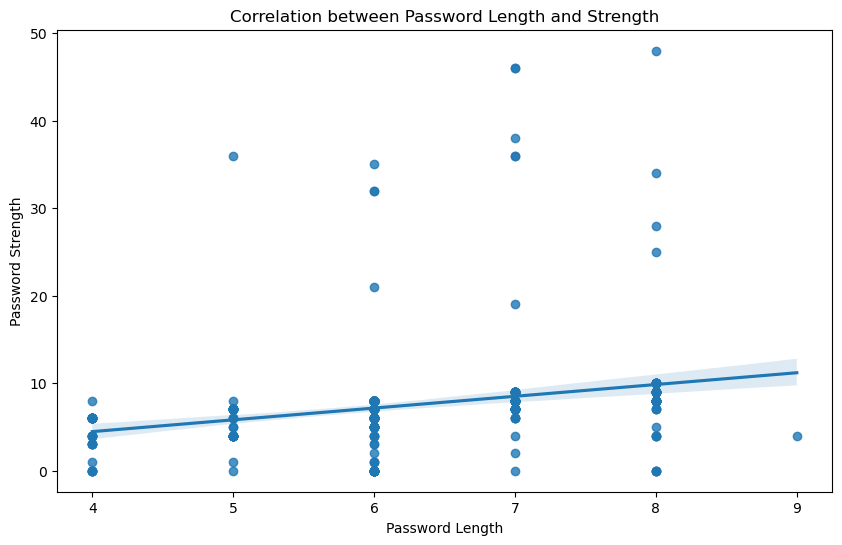

In [23]:
# Your answer here
plt.figure(figsize=(10, 6))
sns.regplot(x='password_length', y='strength', data=df)
plt.title('Correlation between Password Length and Strength')
plt.xlabel('Password Length')
plt.ylabel('Password Strength')
plt.show()

**Bonus question 02**: Find all passwords with palindromes.

In [24]:
# Your answer here
def is_palindrome(password):
    return password == password[::-1]
df[df['password'].apply(is_palindrome)].reset_index()

,index,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,value_in_hours,password_length,strength_label,high_value
0,18,19.0,111111,simple-alphanumeric,18.52,minutes,1.110000e-05,19.0,0.0,0.0,0.308667,6,weak,False
1,59,60.0,666666,simple-alphanumeric,18.52,minutes,1.110000e-05,60.0,0.0,0.0,0.308667,6,weak,False
2,76,77.0,1111,simple-alphanumeric,11.11,seconds,1.110000e-07,77.0,0.0,0.0,0.003086,4,weak,False
3,105,106.0,aaaaaa,simple-alphanumeric,3.72,days,3.210000e-03,106.0,0.0,0.0,89.280000,6,weak,False
4,144,145.0,xxxxxx,simple-alphanumeric,3.72,days,3.210000e-03,145.0,0.0,0.0,89.280000,6,weak,False
5,190,191.0,hannah,name,3.72,days,3.210000e-03,192.0,0.0,0.0,89.280000,6,weak,False
6,192,193.0,11111111,simple-alphanumeric,1.29,days,1.110000e-03,194.0,0.0,0.0,30.960000,8,weak,False
7,206,207.0,7777777,simple-alphanumeric,3.09,hours,1.110000e-04,208.0,0.0,0.0,3.090000,7,weak,False
8,277,278.0,222222,simple-alphanumeric,18.52,minutes,1.110000e-05,279.0,0.0,0.0,0.308667,6,weak,False
9,285,286.0,xxxxxxxx,simple-alphanumeric,6.91,years,2.170000e+00,287.0,0.0,0.0,60531.600000,8,weak,True
